In [ ]:
pip install plotly

In [ ]:
pip install plotly_express

In [ ]:
pip install sklearn

In [32]:
# function to plot a graph for feature importances
def plt_feature_importance():
    feature_imp = pd.Series(rfc.feature_importances_,index=feat_col)
    feature_imp = (feature_imp*100).sort_values(ascending=False)
    fig = px.bar(feature_imp,x=feature_imp.index,y=feature_imp.values,labels={'x':'Features','y':'Importance Percentage %'})
    return fig

In [33]:
# get accuracy of the predicted test class
def get_acc(y_test,prediction):
    acc = metrics.accuracy_score(y_test, prediction)
    return acc*100

In [34]:
# Scale data using Min Max values
def scale_data(X):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    sc = scaler.fit(X)
    X = sc.transform(X)
    return X

In [35]:
# Plot algorithm decision boundaries
def plot_boundaries(iris,algo):
    from sklearn.preprocessing import StandardScaler
    from plotly import subplots
    X = iris[['SepalWidthCm','PetalLengthCm']]  

    y = iris.Species
    y = le.fit_transform(iris.Species)
    h = .02  # step size in the mesh

    X = StandardScaler().fit_transform(X)

    if algo=='rfst':
        trees = RandomForestClassifier(max_depth=5,n_estimators=10,
                                       random_state=0)
        trees.fit(X, y)

        trees_overfit = RandomForestClassifier(max_depth=100, 
                                               n_estimators=10, 
                                               random_state=0)
        trees_overfit.fit(X, y)
        
    elif algo=='svm':
        trees = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.001, C=1,multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
        trees.fit(X,y)
        
    else:
        trees = DecisionTreeClassifier(random_state=0)
        trees.fit(X, y)
        

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                         , np.arange(y_min, y_max, h))
    y_ = np.arange(y_min, y_max, h)

    Z = trees.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)    
    
    
    if algo=='rfst':
        fig = subplots.make_subplots(rows=1, cols=2,
                                  subplot_titles=("Random Forest (Depth = 5)",
                                                  "Random Forest (Depth = 50)")
                                 )

        trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                          colorscale='Viridis',
                          showscale=False)

        trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                            mode='markers',
                            showlegend=True,
                            marker=dict(size=10,
                                        color=y, 
                                        colorscale='Viridis',
                                        line=dict(color='black', width=1))
                            )

        fig.append_trace(trace1, 1, 1)
        fig.append_trace(trace2, 1, 1)
        
    else:
        if algo=='dt':
            fig = subplots.make_subplots(rows=1, cols=2,subplot_titles=("Decision Tree",""))
        else:
            fig = subplots.make_subplots(rows=1, cols=2,subplot_titles=("Support vector Machine",""))
            
        trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                          colorscale='Viridis',
                          showscale=False)

        trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                            mode='markers',
                            showlegend=True,
                            marker=dict(size=10,
                                        color=y, 
                                        colorscale='Viridis',
                                        line=dict(color='black', width=1))
                            )

        fig.append_trace(trace1, 1, 1)
        fig.append_trace(trace2, 1, 1)

    if algo=='rfst':
        Z = trees_overfit.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)


        trace3 = go.Heatmap(x=xx[0], y=y_, 
                            z=Z,
                            colorscale='Viridis',
                            showscale=False)

        trace4 = go.Scatter(x=X[:, 0], y=X[:, 1],
                            mode='markers',
                            showlegend=True,
                            marker=dict(size=10,
                                        color=y, 
                                        colorscale='Viridis',
                                        line=dict(color='black', width=1))
                           )
        fig.append_trace(trace3, 1, 2)
        fig.append_trace(trace4, 1, 2)

    for i in map(str, range(1, 3)):
        x = 'xaxis' + i
        y = 'yaxis' + i
        fig['layout'][x].update(showgrid=False, 
                                zeroline=False,
                                showticklabels=False, 
                                ticks='', 
                                autorange=True)
        fig['layout'][y].update(showgrid=False, 
                                zeroline=False,
                                showticklabels=False, 
                                ticks='', 
                                autorange=True)

    py.iplot(fig)

In [36]:
# plot confucion matrices for any given algorithm
def confusion_matrix(y_test,prediction,algo,acc):
    dtpreds = {'Actual':y_test,'Predicted':prediction}
    df = pd.DataFrame(dtpreds, columns=['Actual','Predicted'])
    confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
    fig = sn.heatmap(confusion_matrix, annot=True,cbar=False)
    if algo=='svm':
        plt.title("Support Vector Machine with Accuracy="+str(acc)+"%")
    elif algo=='dt':
        plt.title("Decision Tree with Accuracy="+str(acc)+"%")
    elif algo=='rf':
        plt.title("Randomn Forest with Accuracy="+str(acc)+"%")
    return fig.get_figure()

# <U>The Iris Flower<U>

<img src="irisall.png">

The Iris Flowerhas 3 different species:
* Iris-virginica
* Iris-versicolor
* Iris-setosa

We need to find a way to classify these species of the Iris among themselves. We have the data of the physical dimensions of the flower like the length and width of the Sepal(Leaves below the petals) and of the Petals. Using this we need to find which species do they belong.

Let's get an insight over the dataset

In [37]:
import pandas as pd
iris = pd.read_csv('Iris.csv')
iris.sample(frac=0.04)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141            6.7           3.1            5.6           2.4   
23    24            5.1           3.3            1.7           0.5   
4      5            5.0           3.6            1.4           0.2   
24    25            4.8           3.4            1.9           0.2   
78    79            6.0           2.9            4.5           1.5   
9     10            4.9           3.1            1.5           0.1   

             Species  
140   Iris-virginica  
23       Iris-setosa  
4        Iris-setosa  
24       Iris-setosa  
78   Iris-versicolor  
9        Iris-setosa

<code>As we can see in the above table, we have the features of the flower in the four columns after the id and we have the species of the flower that we need to predict.<code>

### How do we solve this ?

Let's import all the libraries that we might require today solve this problem.

In [38]:
import plotly_express as px
import numpy as np
from plotly import graph_objects as go
import sklearn as skl
import plotly.offline as py
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt

# 1.  Statistical Analysis

In [39]:
iris.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

# Visualize the dataset

Columns of the iris dataset

In [40]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Go ahead and try changing the x, y, z values down below with any of the feature names.

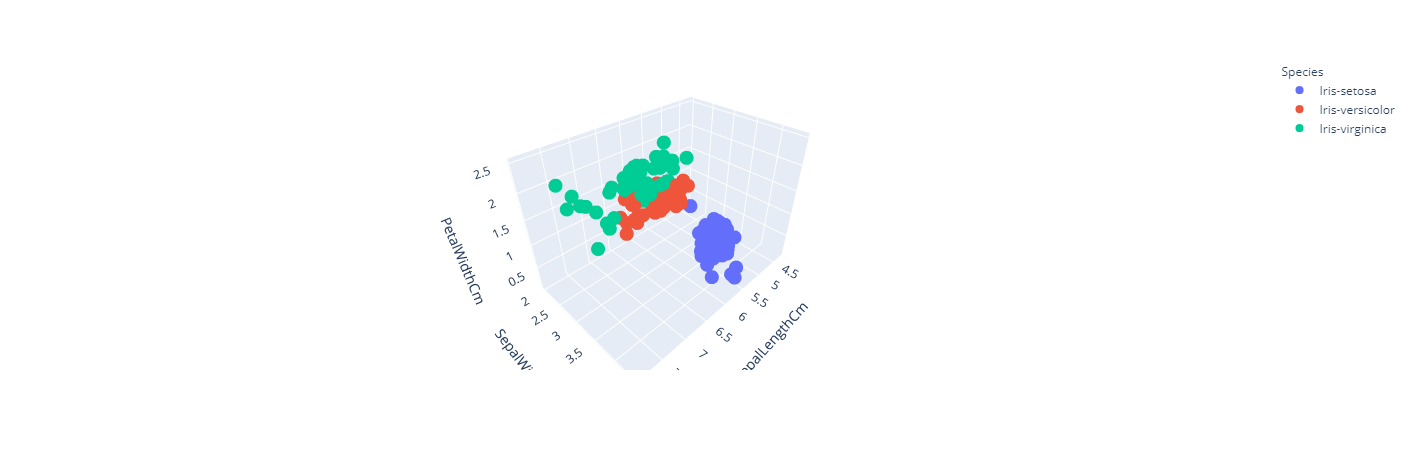

In [41]:
px.scatter_3d(iris,x='SepalLengthCm',y='SepalWidthCm',z='PetalWidthCm',color='Species')

## 2. <u>Statistical Method<U>

Lets seperate out the labels from the features

In [42]:
y = iris.Species
X = iris.drop(columns=['Id','Species'])

Here, X is the set of features and y is the target variable that we will predict.

We split the Data into two parts, two thirds of the data will be used in training and the rest one third for testing the model.

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Seperate out the different species

In [44]:
versicolor = y_train=="Iris-versicolor"
setosa = y_train=="Iris-setosa"
virginica = y_train=="Iris-virginica"
df_versicolor = X_train[versicolor]
df_setosa = X_train[setosa]
df_virginica = X_train[virginica]

Lets us find out the mean and standard deviation of the lengths and widths of petal and sepal of each species of the flower.

In [45]:
df_setosa.describe().iloc[1:3]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
mean       4.964516      3.361290       1.467742      0.245161
std        0.340145      0.376543       0.185089      0.112068

In [46]:
df_versicolor.describe().iloc[1:3]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
mean       5.851429      2.725714       4.220000      1.308571
std        0.528801      0.299355       0.501644      0.204898

In [47]:
df_virginica.describe().iloc[1:3]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
mean       6.552941      2.970588       5.544118      2.011765
std        0.676997      0.308004       0.554973      0.282591

Using the above information we set a limit range (generally in mean +- standard-deviation) for the various features

In [48]:
# Set hard boundaries and check for reach data row.
statpred = []
for i in range(X_test.shape[0]):
    if(X_test.PetalWidthCm.iloc[i]<=0.35):
        label = "Iris-setosa"
    elif(X_test.PetalLengthCm.iloc[i]<=4.7 and X_test.PetalLengthCm.iloc[i]>=3.72  and X_test.PetalWidthCm.iloc[i]<=1.51 and X_test.PetalWidthCm.iloc[i]>=1.1):
        label = "Iris-versicolor"
    else:
        label = "Iris-virginica"
    statpred.append(label)

In statistical approach. We predict the labels by a simple if else condition.

In [49]:
j=0
c=0
for i in statpred:
    if y_test.iloc[j]!=i:
        c+=1
    j+=1

### 2.1 Accuracy of Statistic Model

In [50]:
compare = pd.DataFrame(data = y_test.reset_index(drop=True))
compare['Predicted'] = statpred
compare['Correct?'] = compare.Species==compare.Predicted
compare.head(10)

Species        Predicted  Correct?
0  Iris-versicolor  Iris-versicolor      True
1      Iris-setosa      Iris-setosa      True
2   Iris-virginica   Iris-virginica      True
3  Iris-versicolor  Iris-versicolor      True
4  Iris-versicolor   Iris-virginica     False
5      Iris-setosa   Iris-virginica     False
6  Iris-versicolor   Iris-virginica     False
7   Iris-virginica   Iris-virginica      True
8  Iris-versicolor  Iris-versicolor      True
9  Iris-versicolor  Iris-versicolor      True

In [51]:
acur = (150-c)*100/150
print(np.round(acur,2),"%")

94.0 %


## How can we still improve this ? 

Let us try the Machine Learning Approach

<img src='machinelearning.png' height="50" width="500">

# 3. Data Pre-processing

To apply any Machine learning algorithm to our data, we must prepare our data accordingly.

For the model to be build, our data must be standardized and normalized

Change the labels from string to integer

In [52]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(iris.Species)
X = iris.drop(columns=['Id','Species'])

You can see below how the species of the flower are converted to integers.

In [53]:
display(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Collect all feature columns being used

In [54]:
feat_col = X.columns

Scale the data to be in a fixed range

In [55]:
X = scale_data(X)

## 4. <U>Train Test Split<U>

We split the data in two parts, one would be used to train our model and the other to test our model's prediction.

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 5. <U>Support Vector Machine</U> (SVM)

A SVM classifies the data by drawing hyperplanes in the available dimensional space.

<img src="svm.png"/>

#### 5.1 Train Model

In [60]:
from sklearn.svm import LinearSVC

svm = LinearSVC(penalty='l2', loss='squared_hinge',
                tol=0.001, C=10,
                random_state=0, max_iter=1000)
svm.fit(X_train,y_train)

LinearSVC(C=10, random_state=0, tol=0.001)

#### 5.2 Predict

In [61]:
svmpred = svm.predict(X_test)

#### 5.3 Accuracy

In [62]:
accsvm = get_acc(y_test,svmpred)
print(accsvm,'%')

98.0 %


#### 5.4 Confusion Matrix

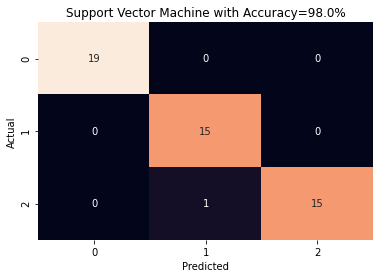

In [63]:
cmsvm = confusion_matrix(y_test,svmpred,'svm',accsvm)

#### 5.5 Decision Boundaries

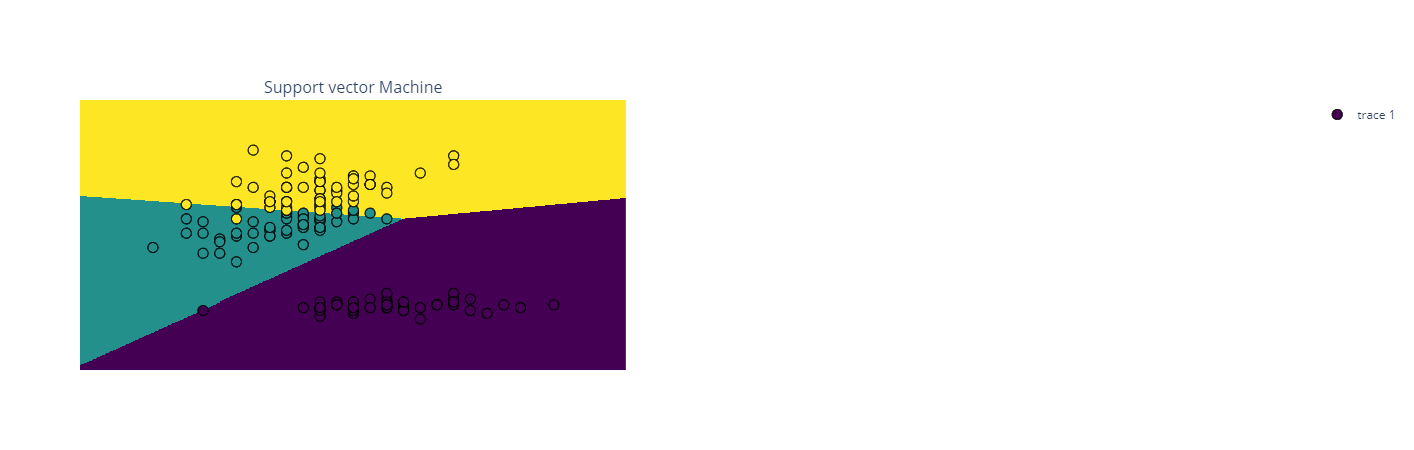

In [64]:
plot_boundaries(iris,'svm')

## 6. <U>Decision Tree Classification<U>

<img src='dt.jpg'>

Decision tree is a Supervised Machine Learning technique where the data is continuously split according to a certain parameter.

#### 6.1 Train the model

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtmodel = dtc.fit(X_train,y_train)

#### 6.2 Predict

In [71]:
prediction = dtmodel.predict(X_test)

In [72]:
prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

The predictions are made in numbers as the species were assigned. But they can be converted back to their labels.

In [73]:
dtpreds = le.inverse_transform(prediction)
display(dtpreds)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

#### 6.3 Accuracy

In [74]:
accdt = get_acc(y_test,prediction)
print(accdt,'%')

96.0 %


#### 6.4 Confusion Matrix

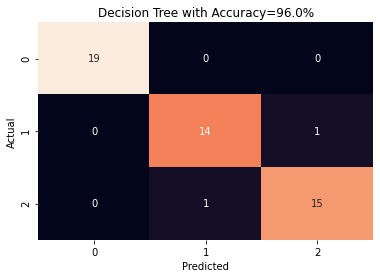

In [75]:
cmdt = confusion_matrix(y_test,prediction,"dt",accdt)

#### 6.5 Decision Boundaries

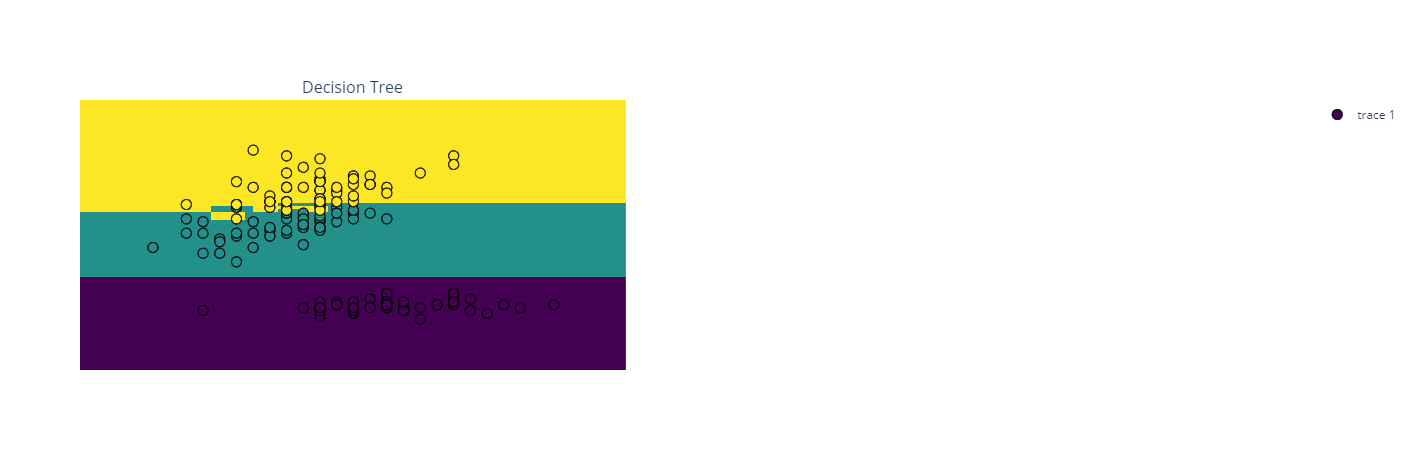

In [76]:
plot_boundaries(iris,'dt')

## 7. <U>Random Forest Classification<U>

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

<img src='pic1.jpeg'/>

<U><code>The reason for this wonderful effect is that the trees protect each other from their individual errors.<code><U>

#### 7.1 Train Model

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=100, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=0)

#### 7.2 Predict

In [79]:
preds = rfc.predict(X_test)
display(preds)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

#### 7.3 Accuracy

In [80]:
accrf = get_acc(y_test,preds)
print(accrf,'%')

98.0 %


#### 7.4 Confusion Matrix

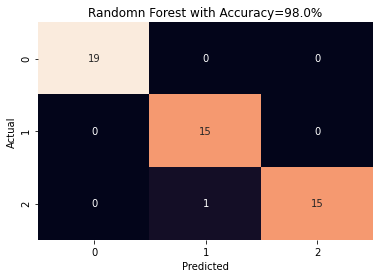

In [81]:
cmrf = confusion_matrix(y_test,preds,'rf',accrf)

#### 7.5 Decision Boundaries

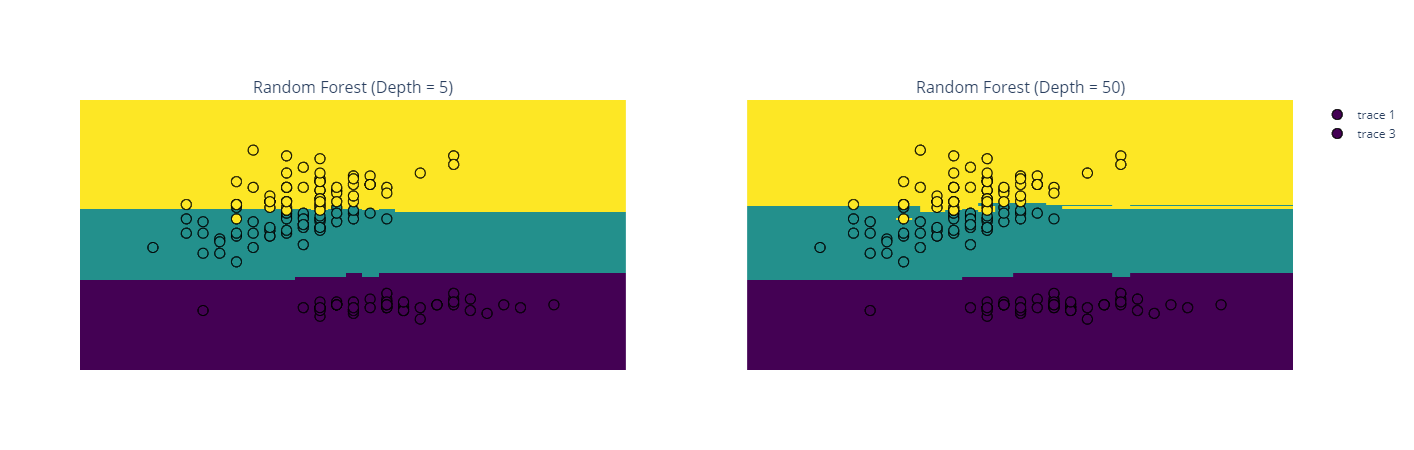

In [43]:
plot_boundaries(iris,'rfst')

## 8. <U>Feature Importances</U>

Features that have been referred to the most to predict the class.

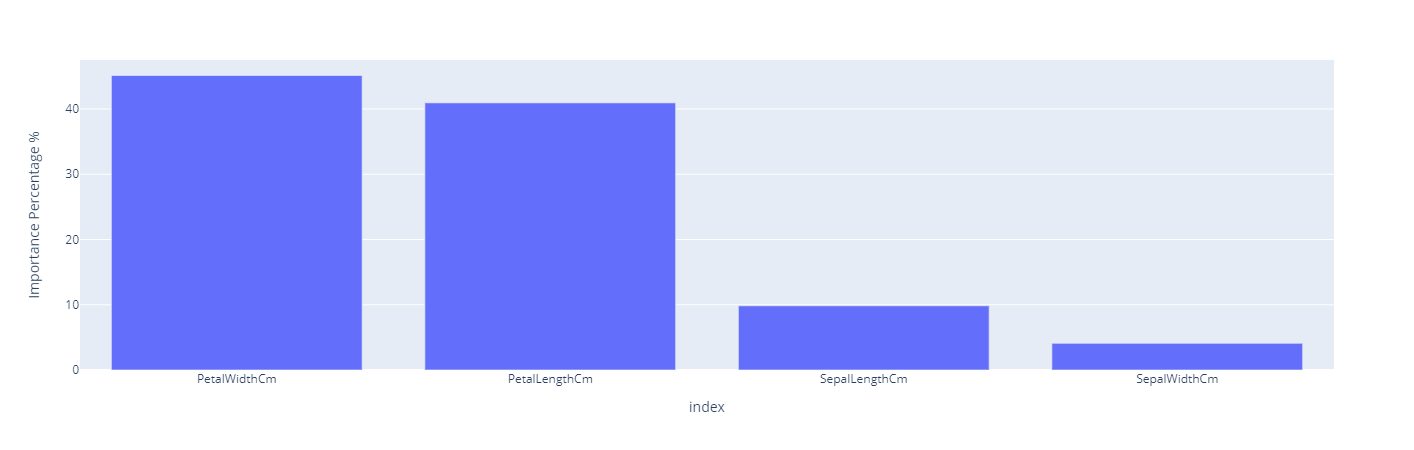

In [82]:
fig = plt_feature_importance()
fig.show()

## 9. <U>Conclusion</U>

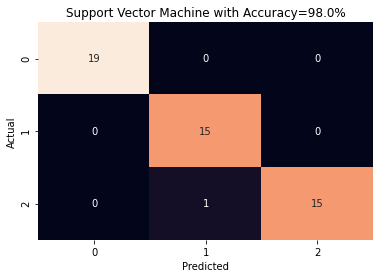

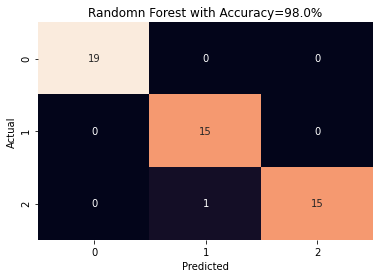

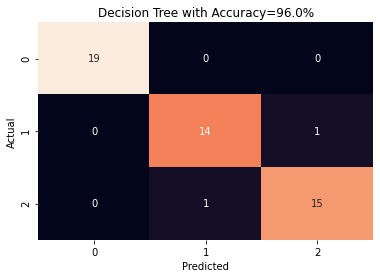

In [83]:
display(cmsvm,cmrf,cmdt)

## 10. <U>Feature adding</U>

Let us add two new features to our dataset. We can calculate the area (length x breadth) of sepal and petal and add them as new features.

In [46]:
iris['SepalArea'] = iris['SepalLengthCm']*iris['SepalWidthCm']
iris['PetalArea'] = iris['PetalLengthCm']*iris['PetalWidthCm']

In [47]:
iris.sample(frac=0.035)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
12    13            4.8           3.0            1.4           0.1   
145  146            6.7           3.0            5.2           2.3   
109  110            7.2           3.6            6.1           2.5   
93    94            5.0           2.3            3.3           1.0   
91    92            6.1           3.0            4.6           1.4   

             Species  SepalArea  PetalArea  
12       Iris-setosa      14.40       0.14  
145   Iris-virginica      20.10      11.96  
109   Iris-virginica      25.92      15.25  
93   Iris-versicolor      11.50       3.30  
91   Iris-versicolor      18.30       6.44

Now let's try running the the models again.

In [48]:
y = le.fit_transform(iris.Species)
X = iris.drop(columns=['Id','Species'])
feat_col = X.columns
X = scale_data(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Scalar Vector Machine (SVM)

In [50]:
svm.fit(X_train,y_train)
new_svm = svm.predict(X_test)

In [51]:
svmacc = get_acc(y_test,new_svm)
print("Previous Accuracy: ",accsvm,"%")
print("New Accuracy: ",svmacc,"%")

Previous Accuracy:  98.0 %
New Accuracy:  98.0 %


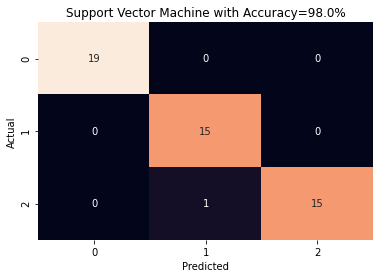

In [52]:
new_cmsvm = confusion_matrix(y_test,new_svm,"svm",svmacc)

### Decision Tree

In [53]:
dtc.fit(X_train,y_train)
new_dtree = dtc.predict(X_test)

In [54]:
dtacc = get_acc(y_test,new_dtree)
print("Previous Accuracy: ",accdt,"%")
print("New Accuracy: ",dtacc,"%")

Previous Accuracy:  96.0 %
New Accuracy:  98.0 %


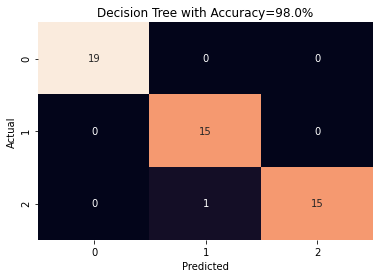

In [55]:
new_cmdt = confusion_matrix(y_test,new_dtree,"dt",dtacc)

### Random Forest

In [56]:
rfc.fit(X_train, y_train)
new_rfst = rfc.predict(X_test)

In [57]:
rfacc = get_acc(y_test,new_rfst)
print("Previous Accuracy: ",accrf,"%")
print("New Accuracy: ",rfacc,"%")

Previous Accuracy:  98.0 %
New Accuracy:  100.0 %


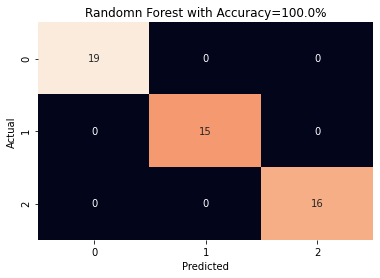

In [58]:
new_cmrf = confusion_matrix(y_test,new_rfst,"rf",rfacc)

## New Feature Importances

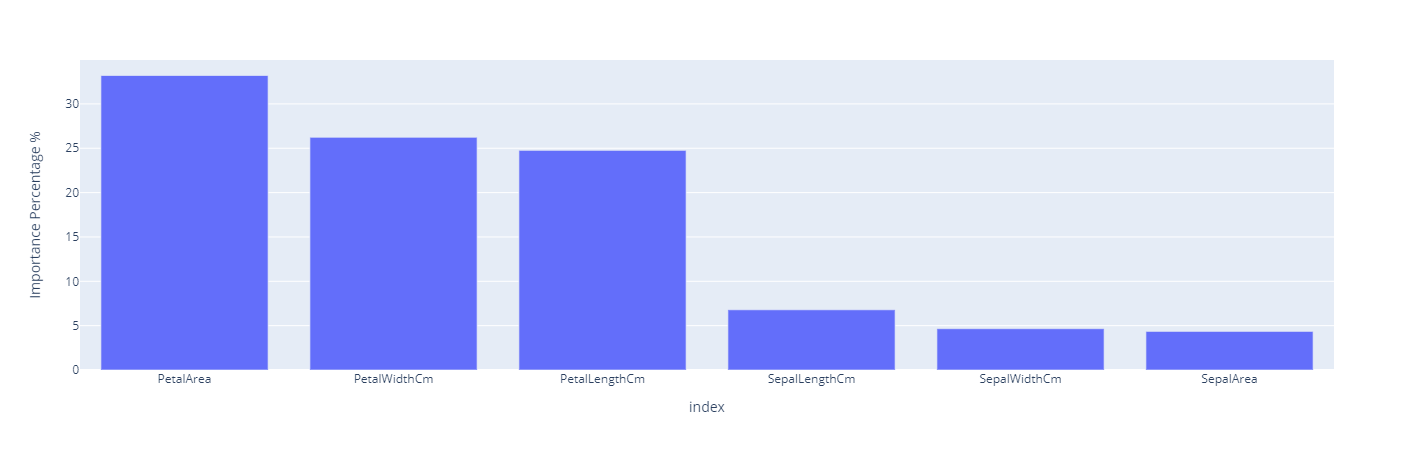

In [59]:
fig = plt_feature_importance()
fig.show()